In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import os

## Error plots for DGP sample regression

In [33]:
! ls exp_init/baseline/*.csv > baseline_list

In [34]:
baseline = pd.DataFrame()
with open('baseline_list') as baseline_list: 
    for baseline_name in baseline_list:
        baseline_new = pd.read_csv(baseline_name.strip(), header=0, index_col=0)
        baseline = pd.concat((baseline,baseline_new), axis=0)
baseline_GP = baseline[baseline.model == 'GP']
baseline_SGP = baseline[baseline.model== 'SGP']
baseline_DGP = baseline[baseline['model'] == 'DGP']

default = pd.DataFrame()
with open('default_list') as default_list: 
    for default_name in default_list:
        default_new = pd.read_csv(default_name.strip(), header=0, index_col=0)
        default = pd.concat((default,default_new), axis=0)


short_long = pd.DataFrame()
with open('short_long_list') as short_long_list: 
    for short_long_name in short_long_list:
        short_long_new = pd.read_csv(short_long_name.strip(), header=0, index_col=0)
        short_long = pd.concat((short_long,short_long_new), axis=0)


long_short = pd.DataFrame()
with open('long_short_list') as long_short_list: 
    for long_short_name in long_short_list:
        long_short_new = pd.read_csv(long_short_name.strip(), header=0, index_col=0)
        long_short = pd.concat((long_short,long_short_new), axis=0)


In [42]:
baseline_SGP = baseline[baseline['model'] == 'SGP']

baseline_SGP_30 = baseline_SGP[baseline_SGP['M'] == 30]
baseline_SGP_40 = baseline_SGP[baseline_SGP['M'] == 40]
baseline_SGP_50 = baseline_SGP[baseline_SGP['M'] == 50]

default_30 = default[default['M'] == 30]
default_40 = default[default['M'] == 40]
default_50 = default[default['M'] == 50]

short_long_30 = short_long[short_long['M'] == 30]
short_long_40 = short_long[short_long['M'] == 40]
short_long_50 = short_long[short_long['M'] == 50]

long_short_30 = long_short[long_short['M'] == 30]
long_short_40 = long_short[long_short['M'] == 40]
long_short_50 = long_short[long_short['M'] == 50]

In [43]:
def df_error(df): 
    df_error = pd.DataFrame()
    df = df.drop_duplicates(subset=['N_train', 'exp'])
    df_error['mse_mean'] = df.pivot(index='N_train', columns='exp',values='mse').mean(axis=1)
    df_error['mse_std'] = df.pivot(index='N_train', columns='exp',values='mse').std(axis=1)
    df_error['nll_mean'] = df.pivot(index='N_train', columns='exp',values='nll').mean(axis=1)
    df_error['nll_std'] = df.pivot(index='N_train', columns='exp',values='nll').std(axis=1)
    return df_error

## Default init vs basiline models

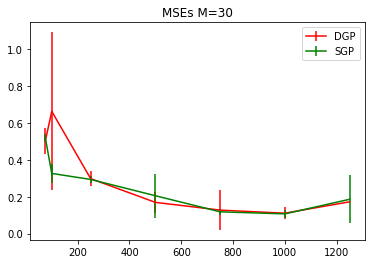

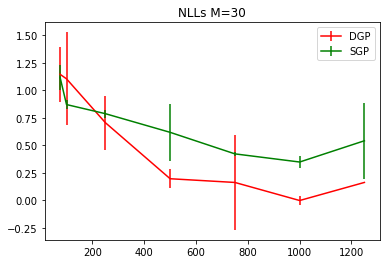

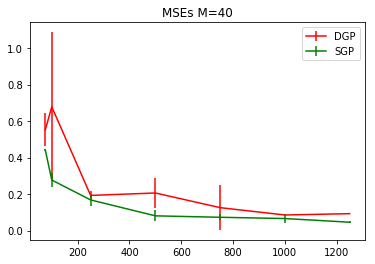

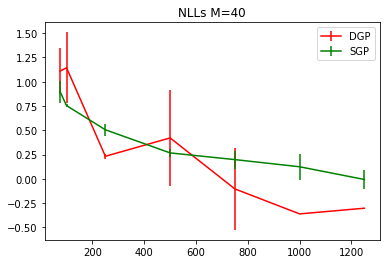

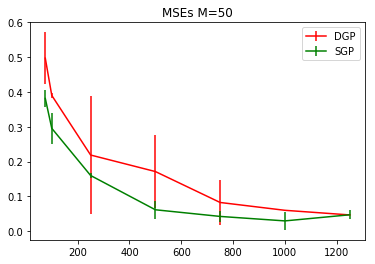

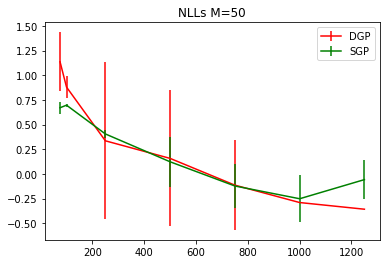

In [45]:
GPs=df_error(baseline_GP)
DGPs=df_error(default_30)
SGPs=df_error(baseline_SGP_30)

# plt.errorbar(GPs.index.values, GPs.mse_mean,yerr=GPs.mse_std,color='k',label='GP')
plt.errorbar(DGPs.index.values, DGPs.mse_mean,yerr=DGPs.mse_std,color='r',label='DGP')
plt.errorbar(SGPs.index.values, SGPs.mse_mean,yerr=SGPs.mse_std,color='g',label='SGP')
plt.legend()
plt.title('MSEs M=30')
plt.show()

# plt.errorbar(GPs.index.values, GPs.nll_mean,yerr=GPs.nll_std,color='k',label='GP')
plt.errorbar(DGPs.index.values, DGPs.nll_mean,yerr=DGPs.nll_std,color='r',label='DGP')
plt.errorbar(SGPs.index.values, SGPs.nll_mean,yerr=SGPs.nll_std,color='g',label='SGP')
plt.legend()
plt.title('NLLs M=30')
plt.show()

GPs=df_error(baseline_GP)
DGPs=df_error(default_40)
SGPs=df_error(baseline_SGP_40)

# plt.errorbar(GPs.index.values, GPs.mse_mean,yerr=GPs.mse_std,color='k',label='GP')
plt.errorbar(DGPs.index.values, DGPs.mse_mean,yerr=DGPs.mse_std,color='r',label='DGP')
plt.errorbar(SGPs.index.values, SGPs.mse_mean,yerr=SGPs.mse_std,color='g',label='SGP')
plt.legend()
plt.title('MSEs M=40')
plt.show()

# plt.errorbar(GPs.index.values, GPs.nll_mean,yerr=GPs.nll_std,color='k',label='GP')
plt.errorbar(DGPs.index.values, DGPs.nll_mean,yerr=DGPs.nll_std,color='r',label='DGP')
plt.errorbar(SGPs.index.values, SGPs.nll_mean,yerr=SGPs.nll_std,color='g',label='SGP')
plt.legend()
plt.title('NLLs M=40')
plt.show()

GPs=df_error(baseline_GP)
DGPs=df_error(default_50)
SGPs=df_error(baseline_SGP_50)

# plt.errorbar(GPs.index.values, GPs.mse_mean,yerr=GPs.mse_std,color='k',label='GP')
plt.errorbar(DGPs.index.values, DGPs.mse_mean,yerr=DGPs.mse_std,color='r',label='DGP')
plt.errorbar(SGPs.index.values, SGPs.mse_mean,yerr=SGPs.mse_std,color='g',label='SGP')
plt.legend()
plt.title('MSEs M=50')
plt.show()

# plt.errorbar(GPs.index.values, GPs.nll_mean,yerr=GPs.nll_std,color='k',label='GP')
plt.errorbar(DGPs.index.values, DGPs.nll_mean,yerr=DGPs.nll_std,color='r',label='DGP')
plt.errorbar(SGPs.index.values, SGPs.nll_mean,yerr=SGPs.nll_std,color='g',label='SGP')
plt.legend()
plt.title('NLLs M=50')
plt.show()


# short_long init vs baseline

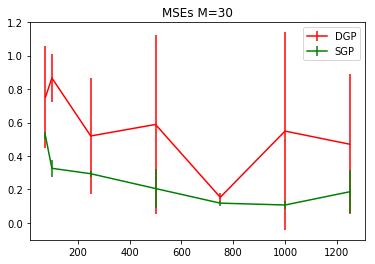

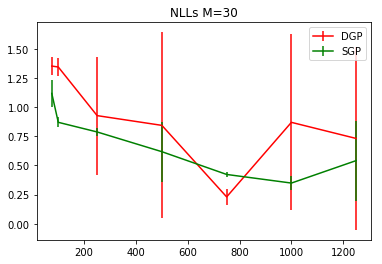

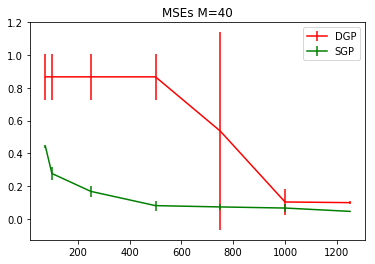

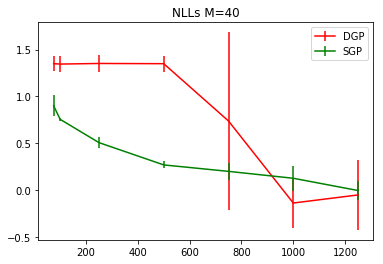

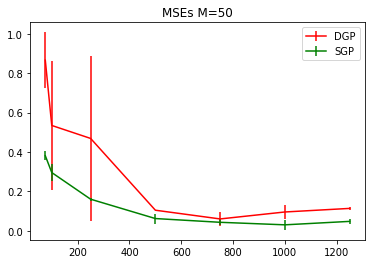

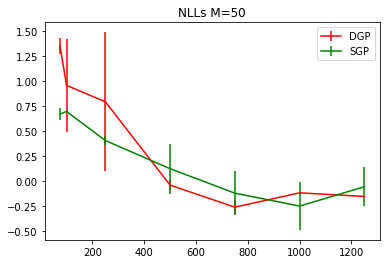

In [47]:
GPs=df_error(baseline_GP)
DGPs=df_error(short_long_30)
SGPs=df_error(baseline_SGP_30)

# plt.errorbar(GPs.index.values, GPs.mse_mean,yerr=GPs.mse_std,color='k',label='GP')
plt.errorbar(DGPs.index.values, DGPs.mse_mean,yerr=DGPs.mse_std,color='r',label='DGP')
plt.errorbar(SGPs.index.values, SGPs.mse_mean,yerr=SGPs.mse_std,color='g',label='SGP')
plt.legend()
plt.title('MSEs M=30')
plt.show()

# plt.errorbar(GPs.index.values, GPs.nll_mean,yerr=GPs.nll_std,color='k',label='GP')
plt.errorbar(DGPs.index.values, DGPs.nll_mean,yerr=DGPs.nll_std,color='r',label='DGP')
plt.errorbar(SGPs.index.values, SGPs.nll_mean,yerr=SGPs.nll_std,color='g',label='SGP')
plt.legend()
plt.title('NLLs M=30')
plt.show()

GPs=df_error(baseline_GP)
DGPs=df_error(short_long_40)
SGPs=df_error(baseline_SGP_40)

# plt.errorbar(GPs.index.values, GPs.mse_mean,yerr=GPs.mse_std,color='k',label='GP')
plt.errorbar(DGPs.index.values, DGPs.mse_mean,yerr=DGPs.mse_std,color='r',label='DGP')
plt.errorbar(SGPs.index.values, SGPs.mse_mean,yerr=SGPs.mse_std,color='g',label='SGP')
plt.legend()
plt.title('MSEs M=40')
plt.show()

# plt.errorbar(GPs.index.values, GPs.nll_mean,yerr=GPs.nll_std,color='k',label='GP')
plt.errorbar(DGPs.index.values, DGPs.nll_mean,yerr=DGPs.nll_std,color='r',label='DGP')
plt.errorbar(SGPs.index.values, SGPs.nll_mean,yerr=SGPs.nll_std,color='g',label='SGP')
plt.legend()
plt.title('NLLs M=40')
plt.show()

GPs=df_error(baseline_GP)
DGPs=df_error(short_long_50)
SGPs=df_error(baseline_SGP_50)

# plt.errorbar(GPs.index.values, GPs.mse_mean,yerr=GPs.mse_std,color='k',label='GP')
plt.errorbar(DGPs.index.values, DGPs.mse_mean,yerr=DGPs.mse_std,color='r',label='DGP')
plt.errorbar(SGPs.index.values, SGPs.mse_mean,yerr=SGPs.mse_std,color='g',label='SGP')
plt.legend()
plt.title('MSEs M=50')
plt.show()

# plt.errorbar(GPs.index.values, GPs.nll_mean,yerr=GPs.nll_std,color='k',label='GP')
plt.errorbar(DGPs.index.values, DGPs.nll_mean,yerr=DGPs.nll_std,color='r',label='DGP')
plt.errorbar(SGPs.index.values, SGPs.nll_mean,yerr=SGPs.nll_std,color='g',label='SGP')
plt.legend()
plt.title('NLLs M=50')
plt.show()


# long_short init vs baseline

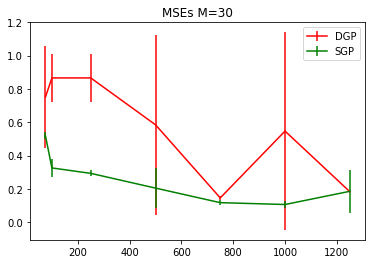

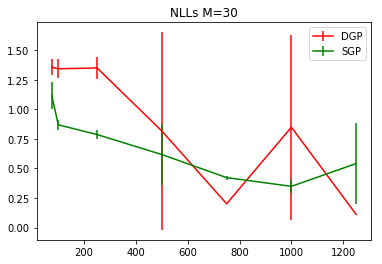

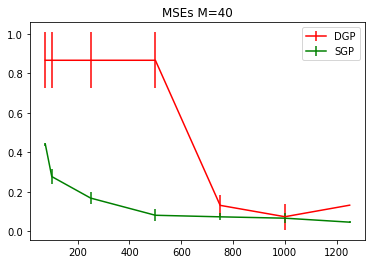

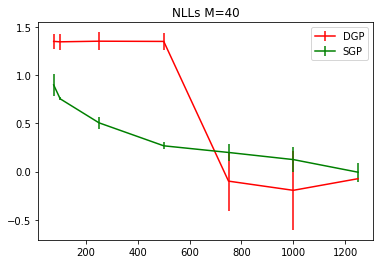

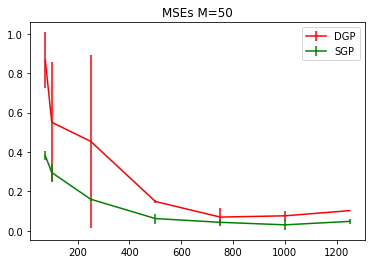

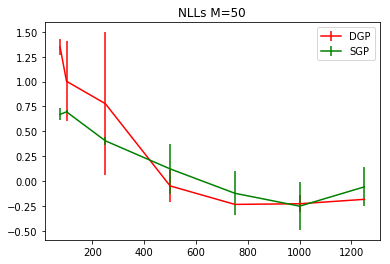

In [48]:
GPs=df_error(baseline_GP)
DGPs=df_error(long_short_30)
SGPs=df_error(baseline_SGP_30)

# plt.errorbar(GPs.index.values, GPs.mse_mean,yerr=GPs.mse_std,color='k',label='GP')
plt.errorbar(DGPs.index.values, DGPs.mse_mean,yerr=DGPs.mse_std,color='r',label='DGP')
plt.errorbar(SGPs.index.values, SGPs.mse_mean,yerr=SGPs.mse_std,color='g',label='SGP')
plt.legend()
plt.title('MSEs M=30')
plt.show()

# plt.errorbar(GPs.index.values, GPs.nll_mean,yerr=GPs.nll_std,color='k',label='GP')
plt.errorbar(DGPs.index.values, DGPs.nll_mean,yerr=DGPs.nll_std,color='r',label='DGP')
plt.errorbar(SGPs.index.values, SGPs.nll_mean,yerr=SGPs.nll_std,color='g',label='SGP')
plt.legend()
plt.title('NLLs M=30')
plt.show()

GPs=df_error(baseline_GP)
DGPs=df_error(long_short_40)
SGPs=df_error(baseline_SGP_40)

# plt.errorbar(GPs.index.values, GPs.mse_mean,yerr=GPs.mse_std,color='k',label='GP')
plt.errorbar(DGPs.index.values, DGPs.mse_mean,yerr=DGPs.mse_std,color='r',label='DGP')
plt.errorbar(SGPs.index.values, SGPs.mse_mean,yerr=SGPs.mse_std,color='g',label='SGP')
plt.legend()
plt.title('MSEs M=40')
plt.show()

# plt.errorbar(GPs.index.values, GPs.nll_mean,yerr=GPs.nll_std,color='k',label='GP')
plt.errorbar(DGPs.index.values, DGPs.nll_mean,yerr=DGPs.nll_std,color='r',label='DGP')
plt.errorbar(SGPs.index.values, SGPs.nll_mean,yerr=SGPs.nll_std,color='g',label='SGP')
plt.legend()
plt.title('NLLs M=40')
plt.show()

GPs=df_error(baseline_GP)
DGPs=df_error(long_short_50)
SGPs=df_error(baseline_SGP_50)

# plt.errorbar(GPs.index.values, GPs.mse_mean,yerr=GPs.mse_std,color='k',label='GP')
plt.errorbar(DGPs.index.values, DGPs.mse_mean,yerr=DGPs.mse_std,color='r',label='DGP')
plt.errorbar(SGPs.index.values, SGPs.mse_mean,yerr=SGPs.mse_std,color='g',label='SGP')
plt.legend()
plt.title('MSEs M=50')
plt.show()

# plt.errorbar(GPs.index.values, GPs.nll_mean,yerr=GPs.nll_std,color='k',label='GP')
plt.errorbar(DGPs.index.values, DGPs.nll_mean,yerr=DGPs.nll_std,color='r',label='DGP')
plt.errorbar(SGPs.index.values, SGPs.nll_mean,yerr=SGPs.nll_std,color='g',label='SGP')
plt.legend()
plt.title('NLLs M=50')
plt.show()


## Individual Experiment plots

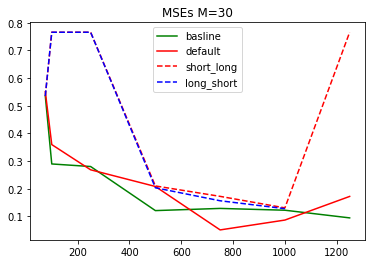

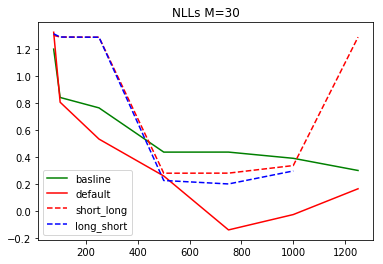

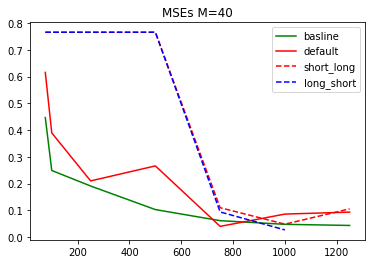

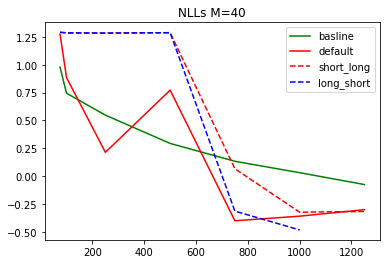

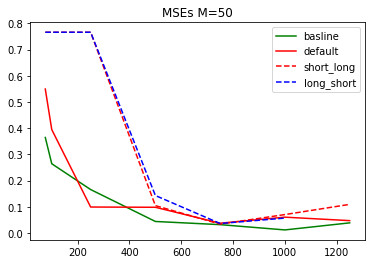

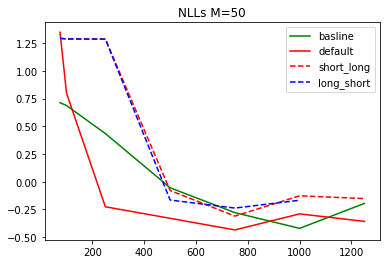

In [58]:
baseline_3 = baseline[baseline['exp'] == 'exp_3']
default_3 = default[default['exp'] == 'exp_3']
short_long_3 = short_long[short_long['exp'] == 'exp_3']
long_short_3 = long_short[long_short['exp'] == 'exp_3']

baseline_SGP = baseline_3[baseline_3['model'] == 'SGP']

baseline_SGP_30 = baseline_SGP[baseline_SGP['M'] == 30]
baseline_SGP_40 = baseline_SGP[baseline_SGP['M'] == 40]
baseline_SGP_50 = baseline_SGP[baseline_SGP['M'] == 50]

default_30 = default_3[default_3['M'] == 30]
default_40 = default_3[default_3['M'] == 40]
default_50 = default_3[default_3['M'] == 50]

short_long_30 = short_long_3[short_long_3['M'] == 30]
short_long_40 = short_long_3[short_long_3['M'] == 40]
short_long_50 = short_long_3[short_long_3['M'] == 50]

long_short_30 = long_short_3[long_short_3['M'] == 30]
long_short_40 = long_short_3[long_short_3['M'] == 40]
long_short_50 = long_short_3[long_short_3['M'] == 50]

plt.figure()
plt.plot(baseline_SGP_30['N_train'],baseline_SGP_30['mse'], '-g',label='basline')
plt.plot(default_30['N_train'],default_30['mse'], '-r',label='default')
plt.plot(short_long_30['N_train'],short_long_30['mse'], '--r',label='short_long')
plt.plot(long_short_30['N_train'],long_short_30['mse'], '--b',label='long_short')
plt.legend()
plt.title('MSEs M=30')
plt.show()

plt.figure()
plt.plot(baseline_SGP_30['N_train'],baseline_SGP_30['nll'], '-g',label='basline')
plt.plot(default_30['N_train'],default_30['nll'], '-r',label='default')
plt.plot(short_long_30['N_train'],short_long_30['nll'], '--r',label='short_long')
plt.plot(long_short_30['N_train'],long_short_30['nll'], '--b',label='long_short')

plt.legend()
plt.title('NLLs M=30')
plt.show()

plt.figure()
plt.plot(baseline_SGP_40['N_train'],baseline_SGP_40['mse'], '-g',label='basline')
plt.plot(default_40['N_train'],default_40['mse'], '-r',label='default')
plt.plot(short_long_40['N_train'],short_long_40['mse'], '--r',label='short_long')
plt.plot(long_short_40['N_train'],long_short_40['mse'], '--b',label='long_short')
plt.legend()
plt.title('MSEs M=40')
plt.show()

plt.figure()
plt.plot(baseline_SGP_40['N_train'],baseline_SGP_40['nll'], '-g',label='basline')
plt.plot(default_40['N_train'],default_40['nll'], '-r',label='default')
plt.plot(short_long_40['N_train'],short_long_40['nll'], '--r',label='short_long')
plt.plot(long_short_40['N_train'],long_short_40['nll'], '--b',label='long_short')

plt.legend()
plt.title('NLLs M=40')
plt.show()

plt.figure()
plt.plot(baseline_SGP_50['N_train'],baseline_SGP_50['mse'], '-g',label='basline')
plt.plot(default_50['N_train'],default_50['mse'], '-r',label='default')
plt.plot(short_long_50['N_train'],short_long_50['mse'], '--r',label='short_long')
plt.plot(long_short_50['N_train'],long_short_50['mse'], '--b',label='long_short')
plt.legend()
plt.title('MSEs M=50')
plt.show()

plt.figure()
plt.plot(baseline_SGP_50['N_train'],baseline_SGP_50['nll'], '-g',label='basline')
plt.plot(default_50['N_train'],default_50['nll'], '-r',label='default')
plt.plot(short_long_50['N_train'],short_long_50['nll'], '--r',label='short_long')
plt.plot(long_short_50['N_train'],long_short_50['nll'], '--b',label='long_short')

plt.legend()
plt.title('NLLs M=50')
plt.show()